Lab 2, Aleksandr Berezutskii, group 4, Skoltech 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Part I. 
Determination of optimal smoothing constant in exponential mean.

Let's generate a true trajectory (of 2 sizes: 3000 and 300) $X_i$ using the random walk model
$$
X_i=X_{i-1}+W_i
$$
Where $W_i$ is normally distributed random noise with zero mathematical expextation and variance $\sigma_W^2=11$ and $X[0]=10$

In [2]:
#introducing noises
W1=np.random.normal(loc=0.0, scale=np.sqrt(11), size=3000)
W2=np.random.normal(loc=0.0, scale=np.sqrt(11), size=300)

In [3]:
#introducing steps
X1=np.zeros(len(W1))
X2=np.zeros(len(W2))

X1[0]=10
X2[0]=10

In [4]:
#building trajectories
for i in range(len(W1)):
    X1[i]=X1[i-1]+W1[i]

for i in range(len(W2)):
    X2[i]=X2[i-1]+W2[i]

Now let's generate measurements $Z_i$ of the process $X_i$
$$
Z_i = X_i + \eta_i
$$
Where $\eta_i$ is normally distributed random noise with zero mathematical expectation and variance $\sigma_\eta^2=10$

In [5]:
#introducing measurement noise
eta1=np.random.normal(loc=0.0, scale=np.sqrt(10), size=3000)
eta2=np.random.normal(loc=0.0, scale=np.sqrt(10), size=300)

In [6]:
#introducing measurements of the steps
Z1=np.zeros(len(W1))
Z2=np.zeros(len(W2))

for i in range(len(W1)):
    Z1[i]=X1[i]+eta1[i]

for i in range(len(W2)):
    Z2[i]=X2[i]+eta2[i]

Now we're going to identify $\sigma_W^2$ and $\sigma_\eta^2$ using identification method presented in class. 

We're going to perform identification for both sizes of trajectories and compare estimation results with true values of $\sigma_W^2$ and $\sigma_\eta^2$. Also we will compare the accuracy of estimation.

Here are the equations we're going to use
$$
\nu_i = Z_i - Z_{i-1}
$$
$$
\rho_i = Z_i - Z_{i-2}
$$
$$
E[\nu_i^2] \approx \cfrac{1}{N-1}\sum_{k=2}^N \nu_k^2
$$
$$
E[\rho_i^2] \approx \cfrac{1}{N-2}\sum_{k=3}^N \rho_k^2
$$
$$
E[\nu_i^2] = \sigma_W^2 + 2\sigma_\eta^2
$$
$$
E[\rho_i^2] = 2\sigma_W^2 + 2\sigma_\eta^2
$$

Thus one derives
$$
\sigma_W^2 = E[\rho_i^2] - E[\nu_i^2]
$$
$$
\sigma_\eta^2 = \cfrac{2E[\nu_i^2] - E[\rho_i^2]}{2}
$$


In [7]:
#building nu and rho
nu1 = np.zeros(len(W1))
rho1 = np.zeros(len(W1))
for i in range(len(W1)):
    nu1[i] = Z1[i] - Z1[i-1]
    rho1[i] = Z1[i] - Z1[i-2]
    
nu2=np.zeros(len(W2))
rho2 = np.zeros(len(W2))
for i in range(len(W2)):
    nu2[i] = Z2[i] - Z2[i-1]
    rho2[i] = Z2[i] - Z2[i-2]

In [8]:
#building mean squares of nu
Enu1=0
Enu2=0
for i in range(2,len(W1)):
    Enu1 = Enu1 + nu1[i]**2

Enu1 = (1/(len(W1)-1))*Enu1

for i in range(2,len(W2)):
    Enu2 = Enu2 + nu2[i]**2

Enu2 = (1/(len(W2)-1))*Enu2

In [9]:
#building mean squares of rho
Erho1=0
Erho2=0
for i in range(3,len(W1)):
    Erho1 = Erho1 + rho1[i]**2

Erho1 = (1/(len(W1)-2))*Erho1

for i in range(3,len(W2)):
    Erho2 = Erho2 + rho2[i]**2

Erho2 = (1/(len(W2)-2))*Erho2

In [10]:
print("for 3000 points sigma_W^2 =", Erho1 - Enu1)
print("for 3000 points sigma_Eta^2 =",(2*Enu1 - Erho1)/2)
print("for 3000 points sigma_W^2 the accuracy is ", abs(np.round((((Erho1 - Enu1)-11)/11)*100,2)),"%")
print("for 3000 points sigma_Eta^2 the accuracy is ", abs(np.round((((2*Enu1 - Erho1)/2-10)/10)*100,2)),"%")

for 3000 points sigma_W^2 = 10.589341917
for 3000 points sigma_Eta^2 = 10.755919714
for 3000 points sigma_W^2 the accuracy is  3.73 %
for 3000 points sigma_Eta^2 the accuracy is  7.56 %


In [11]:
print("for 300 points sigma_W^2 =", Erho2 - Enu2)
print("for 300 points sigma_Eta^2 =",(2*Enu2 - Erho2)/2)
print("for 300 points sigma_W^2 the accuracy is ", abs(np.round((((Erho2 - Enu2)-11)/11)*100,2)),"%")
print("for 300 points sigma_Eta^2 the accuracy is ", abs(np.round((((2*Enu2 - Erho2)/2-10)/10)*100,2)),"%")

for 300 points sigma_W^2 = 13.945053496
for 300 points sigma_Eta^2 = 10.6875900849
for 300 points sigma_W^2 the accuracy is  26.77 %
for 300 points sigma_Eta^2 the accuracy is  6.88 %


Let's now determine optimal smoothing coefficient used in exponential smoothing procedure
$$
\alpha = \cfrac{-\chi+\sqrt{\chi^2+4\chi}}{2}
$$
where
$$
\chi = \cfrac{\sigma_W^2}{\sigma_\eta^2}
$$
and sigmas that have been defined, not initial ones are put into the equation

In [12]:
chi = (Erho1 - Enu1)/((2*Enu1 - Erho1)/2)
alpha = (-chi+np.sqrt(chi**2+4*chi))/2

In [13]:
print("chi =", chi)
print("alpha =", alpha)

chi = 0.984512919266
alpha = 0.615366825296


Now let us perform exponential smoothing with the determined $\alpha$ and plot results (smoothened), measurements and true values of the process.

In [14]:
X1ES = np.zeros(len(W1))
X2ES = np.zeros(len(W2))

for i in range(len(W1)):
    X1ES[i] = alpha*Z1[i] + (1-alpha)*X1ES[i-1]

for i in range(len(W2)):
    X2ES[i] = alpha*Z2[i] + (1-alpha)*X2ES[i-1]

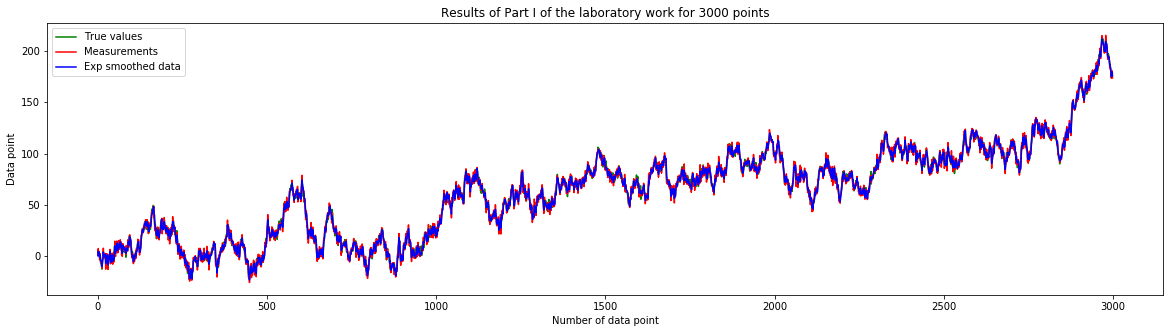

In [15]:
plt.figure(figsize=(20,5))
plt.plot(X1, '-', color='green', label='True values')
plt.plot(Z1, '-', color='red', label='Measurements')
plt.plot(X1ES, '-', color='blue', label='Exp smoothed data')
plt.title('Results of Part I of the laboratory work for 3000 points')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Exp smoothed data'], loc = 'best')
plt.show()

We almost can't see the differences, because may be sigmas are rather small and smoothing is done well so let's see the same plot on a larger scale

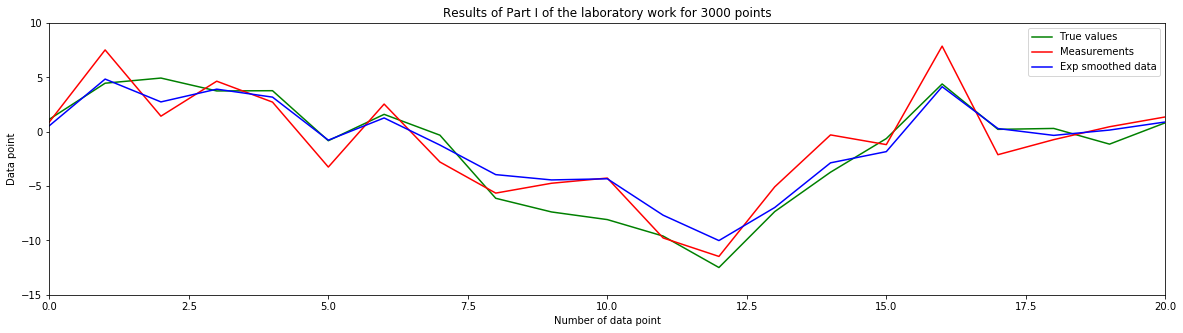

In [44]:
plt.figure(figsize=(20,5))
plt.plot(X1, '-', color='green', label='True values')
plt.plot(Z1, '-', color='red', label='Measurements')
plt.plot(X1ES, '-', color='blue', label='Exp smoothed data')
plt.title('Results of Part I of the laboratory work for 3000 points')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.xlim(0,20)
plt.ylim(-15,10)
plt.legend(['True values', 'Measurements', 'Exp smoothed data'], loc = 'best')
plt.show()

Here it can be clearly seen that measurements introduce noise to true values, but exponential smoothening makes the curve look more similar to real data, although not in an always ideal way

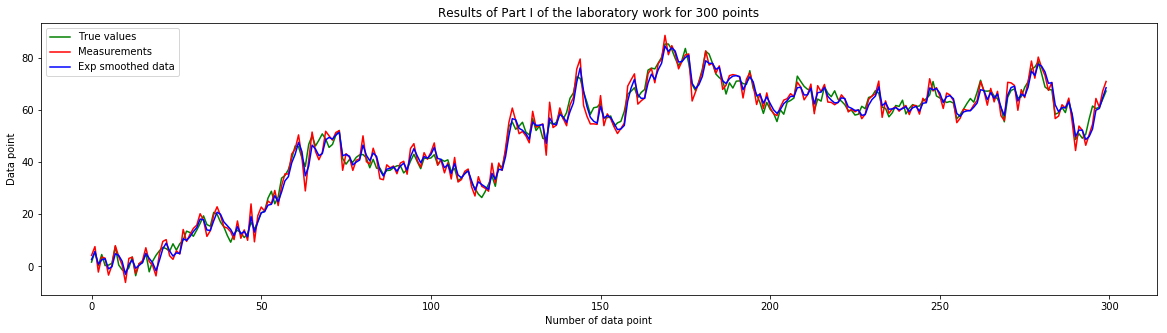

In [17]:
plt.figure(figsize=(20,5))
plt.plot(X2, '-', color='green', label='True values')
plt.plot(Z2, '-', color='red', label='Measurements')
plt.plot(X2ES, '-', color='blue', label='Exp smoothed data')
plt.title('Results of Part I of the laboratory work for 300 points')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Exp smoothed data'], loc = 'best')
plt.show()

Conclusion on Part I: We have simulated a random walk process and measured it with random noise measurements. Through a number of equations from statistics we've estimated sigmas which were pretty close to their initial values. After that we used these sigmas to estimate optimal $\alpha$, perform exponential smoothing and plot the data.

Part II. Comparison of methodical errors of exponential and running mean

Let's generate a true trajectory $X_i$ of size 300, using the random walk model
$$
X_i=X_{i-1}+W_i
$$
Where $W_i$ is normally distributed random noise with zero mathematical expextation and variance $\sigma_W^2=28^2$ and $X[0]=10$

In [18]:
#introducing noise
sigmaW=28
WII=np.random.normal(loc=0.0, scale=sigmaW, size=300)

In [19]:
#introducing steps
XII=np.zeros(len(WII))

XII[0]=10

In [20]:
#building trajectory
for i in range(len(WII)):
    XII[i]=XII[i-1]+WII[i]

Now let's generate measurements $Z_i$ of the process $X_i$
$$
Z_i = X_i + \eta_i
$$
Where $\eta_i$ is normally distributed random noise with zero mathematical expectation and variance $\sigma_\eta^2=97^2$

In [21]:
#introducing measurement noise
sigmaeta=97
etaII=np.random.normal(loc=0.0, scale=sigmaeta, size=300)

In [22]:
#introducing measurements of the steps
ZII = np.zeros(len(WII))

for i in range(len(WII)):
    ZII[i] = XII[i] + etaII[i]

Now we'll find $\alpha$ from the following formulas given initial sigmas
$$
\alpha = \cfrac{-\chi+\sqrt{\chi^2+4\chi}}{2}
$$
where
$$
\chi = \cfrac{\sigma_W^2}{\sigma_\eta^2}
$$

In [23]:
chi=(sigmaW/sigmaeta)**2
a=(-chi+np.sqrt(chi**2+4*chi))/2
print('alpha =', a)

alpha = 0.249988612331


The components of full error related to measurement errors are determined as Running Mean (RM):
$$
\sigma_{RM}^2 = \cfrac{\sigma_\eta^2}{M}
$$
and Exponential Smoothing (ES):
$$
\sigma_{ES}^2 = \sigma_\eta^2 \cfrac{\alpha}{2-\alpha}
$$

Now we should determine the smoothing window size $M$ (in round values) that provides equality of $\sigma_{RM}^2$ and $\sigma_{ES}^2$

That is $M = \cfrac{2-\alpha}{\alpha}$

In [24]:
M= int((2-a)/a)
print("M =", M)

M = 7


Now let us perform running mean with determined window size $M$, exponential smoothing with the determined $\alpha$ and plot results (smoothened by different means), measurements and true values of the process.

In [38]:
#running mean
XIIRM = np.zeros(len(WII))

for i in range(int((M-1)/2), len(WII)-int((M-1)/2)):
    for k in range(i-int((M-1)/2), i+int((M-1)/2)):
        XIIRM[i] = XIIRM[i] + (1/M)*ZII[k]
        
for i in range(len(WII)-int((M-1)/2), len(WII)):
    XIIRM[i] = ZII[i]

In [39]:
#exponential smoothing
XIIES = np.zeros(len(WII))

for i in range(len(WII)):
    XIIES[i] = a*ZII[i] + (1-a)*XIIES[i-1]

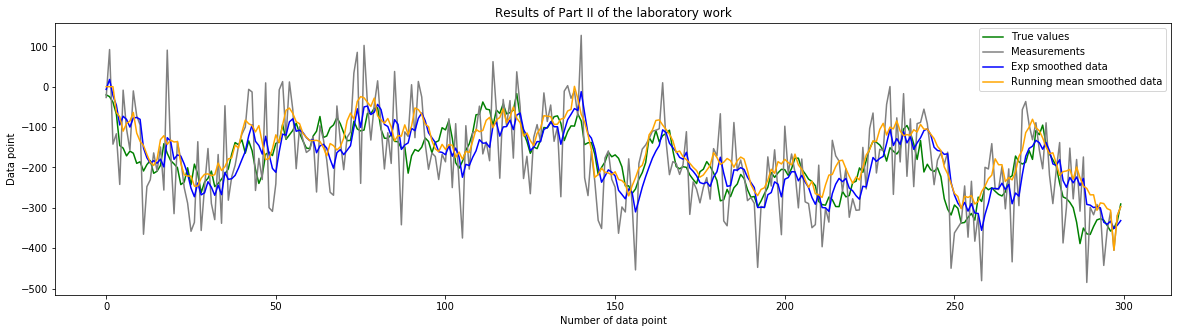

In [40]:
plt.figure(figsize=(20,5))
plt.plot(XII, '-', color='green', label='True values')
plt.plot(ZII, '-', color='gray', label='Measurements')
plt.plot(XIIES, '-', color='blue', label='Exp smoothed data')
plt.plot(XIIRM, '-', color='orange', label='Running mean smoothed data')
plt.title('Results of Part II of the laboratory work')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', 'Measurements', 'Exp smoothed data','Running mean smoothed data'], loc = 'best')

plt.show()

To sum up part II: We compared the methodical errors of exponential and running mean and defined that that running mean smoothing method gives greater methodical error in conditions of equal errors conditioned by measurement errors for this particular generated trajectory.

Now let's make a conclusion to the whole laboratory work: We compared the errors of exponential and running mean and chose the most effective quasi-optimal estimation method in conditions of uncertainty. Additional important outcome of this exercise was the solution of identification problem of noise statistics that is crucial for reliable estimation. It also should be noted that although these methods of smoothing data are rather simple and can be implied from scratch, the avialability of performing this or that particular method requiers careful and thorough analysis beforehand.